<a href="https://colab.research.google.com/github/gilsonauerswald/Bioinformatic_Projects/blob/main/R_C2_L9_Classification_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome Back to R-Coding Course 2!**

In the previous lesson, we covered Clustering: K-means & Hierachical clustering. If you haven't completed these topics, please refer to [L08 - Clustering: K-means & Hierachical clustering](https://learn.omicslogic.com/R-Code/r-coding-course-2-introduction-to-data-science-bioml/lesson/08-clustering-k-means-and-hierachical-clustering) before practicing the codes for this lesson.

# **Let's Recap!**

Now that we've covered essential concepts in [L09 - Classification RF](https://learn.omicslogic.com/R-Code/r-coding-course-2-introduction-to-data-science-bioml/lesson/09-classification-rf), let's take a moment to reinforce what we've learned so far. We'll start with a brief recap of the codes and techniques we've explored in the lesson.

# **Lesson Code Breakdown**

## **1. Load data**

In [ ]:
data <-read.table("https://raw.githubusercontent.com/pine-bio-support/Predictive_model_Classification_Regression/main/CellLines_52samples_ExprData_tpose2.txt", sep=",", header=TRUE, check.names=F)


This R code reads a tabular dataset from a URL using read.table. The data is in CSV format, as indicated by sep=",". The resulting data frame, named "data," includes headers and allows for further analysis of the gene expression data for 52 samples.

## **2. Split training and test data into 80:20 ratio.**

In [ ]:
dt = sort(sample(nrow(data), nrow(data)*.8))

This R code generates a random sample of 80% of the row indices of the "data" data frame using the sample function. The resulting vector, named "dt," represents the indices of the selected rows, providing a way to partition the data for training or validation purposes in predictive modeling.

## **3. Create Training set.**

In [ ]:
train_set<-data[dt,]


This R code creates a training set, named "train_set," by subsetting the "data" data frame using the row indices stored in the vector "dt." The training set includes 80% of the original data, and it can be used for building and training predictive models.

## **4. Create Test set.**

In [ ]:
test_set<-data[-dt,]


This R code creates a test set, named "test_set," by subsetting the "data" data frame using the row indices that are not included in the "dt" vector. The resulting test set includes the remaining 20% of the original data and can be used to evaluate the performance of predictive models trained on the training set.

## **5. Write training data into output file.**

In [ ]:
write.table(train_set, file = "train_set.txt", sep="\t", quote=F, row.names = F)


This R code writes the "train_set" data frame to a tab-separated text file named "train_set.txt" using the write.table function. The file is formatted with tab-separated values (sep="\t"), and row names are excluded (row.names = FALSE). The resulting file can be used for further analysis or as a training dataset for predictive modeling.

## **6. Write test data into output file.**


In [ ]:
write.table(test_set, file = "test_set.txt", sep="\t", quote=F, row.names = F)


This R code writes the "test_set" data frame to a tab-separated text file named "test_set.txt" using the write.table function. The file is formatted with tab-separated values (sep="\t"), and row names are excluded (row.names = FALSE). The resulting file can be used for further analysis or as a test dataset to assess the performance of predictive models.

# **Besides, preparing training and test data separately, you can also do within code.**
Below you can learn how to do:

## **1. Install packages.**

In [ ]:
install.packages("randomForest")
install.packages("BBmisc")
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘checkmate’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




This R code installs three packages, "randomForest," "BBmisc," and "pROC," using the install.packages function. These packages are commonly used for building random forests, handling miscellaneous tasks, and conducting receiver operating characteristic (ROC) analysis, respectively.

## **2. Load libraries and train data.**

In [ ]:
#Load libraries
library(randomForest)
library(BBmisc)
library(pROC)
options(stringsAsFactors = FALSE)
numtrees <- as.numeric(500)


#Prepare training table
trainset <- read.table("https://code.omicslogic.com/assets/datasets/cell_lines/CellLines_52samples_ExprData_T1.txt", sep='\t', header=FALSE, stringsAsFactors=FALSE)


#transpose
id_n = 1
trainset = data.frame(t(trainset))


#define column names (data has been transposed, so these are genes)
cnam <- t(trainset)[,1]
trainset <- trainset[-1,]
colnames(trainset) <- cnam


#define row names (data has been transposed, so these are names of samples)
rnam <- trainset[,id_n]
trainset <- trainset[,-id_n]
rownames(trainset) <- rnam


#define numeric data
trainset[,1]<- as.factor(trainset[,1])
len= dim (trainset)[2]
for (j in (2:len)){
  trainset [,j]<- as.numeric(trainset[,j])
}

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘BBmisc’


The following object is masked from ‘package:base’:

    isFALSE


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var





This R code loads the "randomForest," "BBmisc," and "pROC" libraries, sets an option to handle strings as factors, and defines the number of trees as 500. It then loads and preprocesses a training dataset from a URL, transposing it and converting relevant columns to factors and numerics. The dataset is prepared for building a random forest model.

## **3. Load and prepare test data.**

In [ ]:
#Prepare testing dataset - transpose if required, etc.
testset <- read.table("https://code.omicslogic.com/assets/datasets/cell_lines/CellLines_52samples_ExprData_T1.txt", sep="\t", header=FALSE, stringsAsFactors=FALSE)
testset <- data.frame(t(testset))

#define column names
cnam <- t(testset)[,1]
testset <- testset[-1,]
colnames(testset) <- cnam


#define row names
rnam <- testset[,1]
testset <- testset[,-1]
rownames(testset) <- rnam


len <- dim (testset)[2]
for (j in (1:len)){
  testset [,j]<- as.numeric(testset[,j])
}

Warning message:
“NAs introduced by coercion”



This R code prepares a testing dataset by loading it from a URL, transposing if required, and converting relevant columns to numeric types. It ensures proper column and row naming for subsequent analysis, such as evaluating the performance of a predictive model on this dataset.

## **4. Build the prediction model using the randomForest function.**

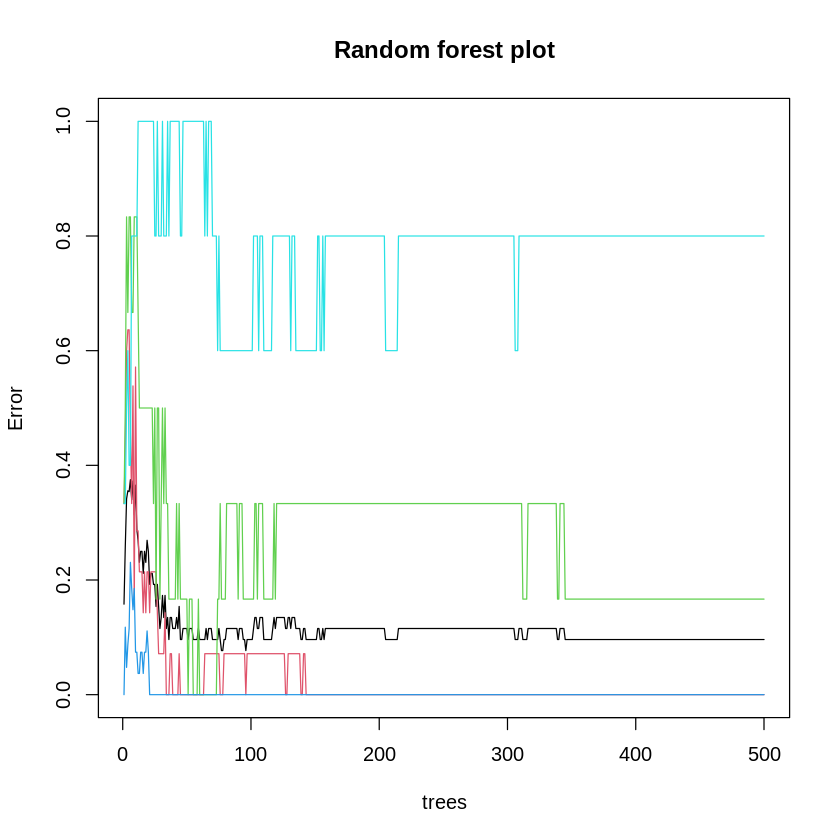

In [ ]:
#Perform main computations - train classifiers
trainset [,1] <- factor(trainset[,1])
rforest <- randomForest(class ~ ., data=trainset, ntree=numtrees, importance=TRUE)

#Draw plots
plot (rforest, main='Random forest plot', lty=1, cex=1.5)


This R code trains a random forest classifier on the training dataset ("trainset") using the "randomForest" package. It considers the first column as the response variable and the rest as predictor variables. The number of trees is set to the previously defined "numtrees" (500), and the importance of variables is computed. The code then draws a plot of the random forest model, displaying information about the trees in the ensemble.

## **5. Create an output for features by feature importance.**

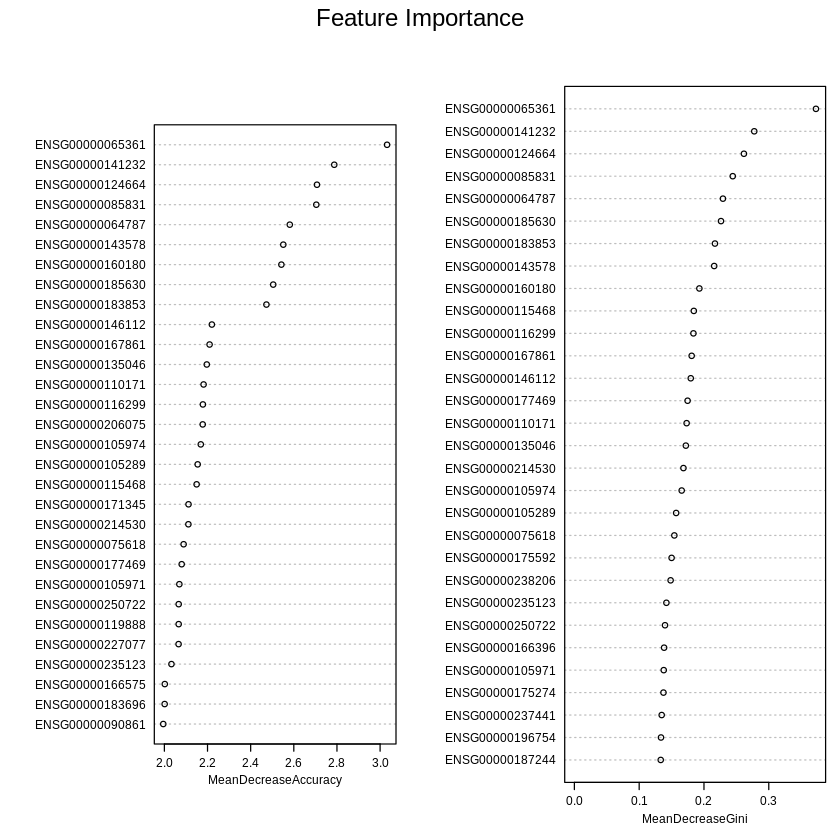

In [ ]:
#Feature importance
varImpPlot(rforest, main='Feature Importance', pch=1, cex=0.6)

#Store features in a vaiable as features
features <- varImpPlot(rforest, main='Feature Importance', pch=1, cex=0.6)
#Write features in a txt file format
write.table(features,'features_importance.txt', row.names=TRUE,col.names=NA, sep='\t', quote=FALSE)


This R code generates a variable importance plot for the random forest model using the varImpPlot function from the "randomForest" package. It then stores the features' importance information in a variable named "features" and writes this information to a text file named "features_importance.txt" in tab-separated format. The resulting file can be used for further analysis or interpretation of the model.

## **6. Test the model on test data.**

In [ ]:
#Apply classifier to the test set
prediction <- predict(rforest, testset, type='prob')
prediction <- data.frame(prediction, check.names = FALSE)
rownames(prediction) <- rownames(testset)

#Print out prediction values
a <- print(prediction)
write.table(a, file = "prediction_class.txt", sep="\t", quote=F, row.names = T)
#print(rforest)
#print(rforest$err.rate)
#print(rforest$votes)
#print(trainset$class)

            Basal Claudin-low Luminal Normal-like
184A1       0.154       0.058   0.020       0.768
184B5       0.130       0.026   0.064       0.780
21MT1       0.896       0.020   0.050       0.034
21NT        0.936       0.010   0.032       0.022
21PT        0.930       0.014   0.028       0.028
600MPE      0.060       0.026   0.894       0.020
AU565       0.038       0.000   0.954       0.008
BT474       0.024       0.016   0.958       0.002
BT483       0.012       0.004   0.982       0.002
BT549       0.116       0.802   0.018       0.064
CAMA1       0.038       0.004   0.956       0.002
EFM192A     0.018       0.000   0.982       0.000
EFM192B     0.040       0.012   0.942       0.006
EFM192C     0.012       0.002   0.984       0.002
HCC1143     0.856       0.052   0.048       0.044
HCC1395     0.124       0.762   0.058       0.056
HCC1419     0.024       0.004   0.966       0.006
HCC1428     0.028       0.012   0.952       0.008
HCC1569     0.764       0.070   0.128       0.038



This R code applies the trained random forest classifier ("rforest") to the test dataset ("testset") to make predictions. The predictions, including class probabilities, are stored in a data frame named "prediction." The results are printed and written to a text file named "prediction_class.txt" in tab-separated format. The code also contains commented-out lines for printing additional information such as error rates, votes, and the true class labels from the training set.

## **7. Evaluate model's Performance in terms of ROC.**

AUC and ROC curves

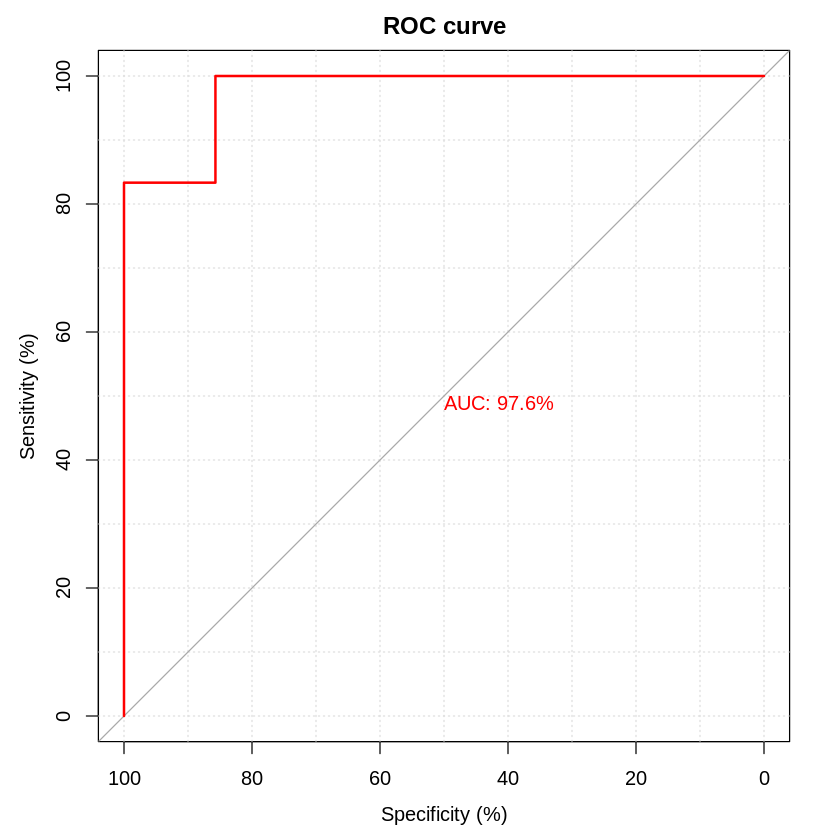

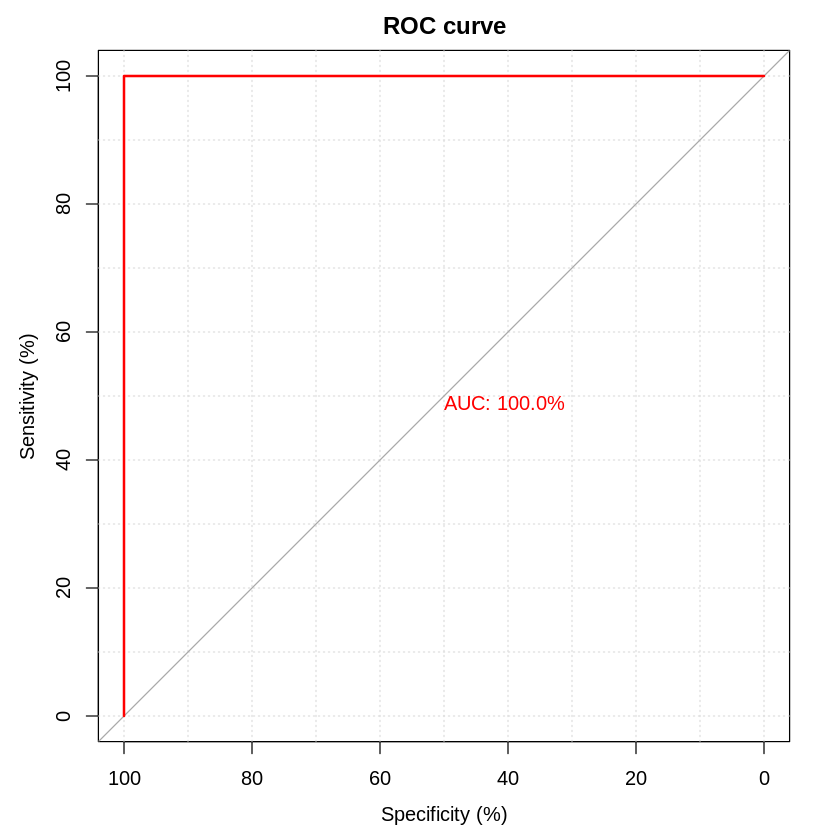

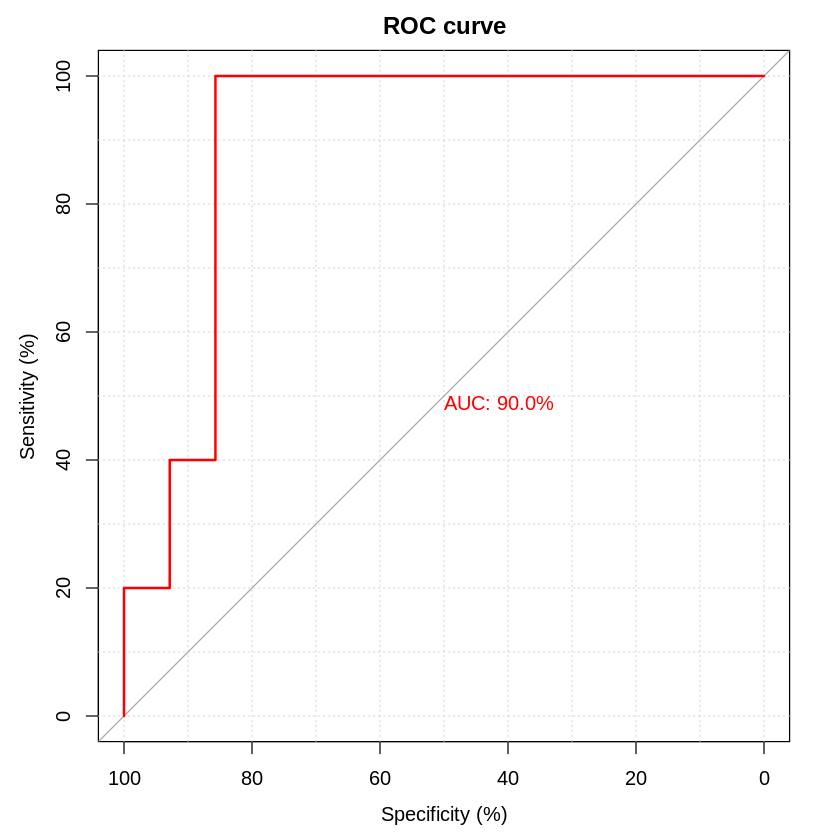

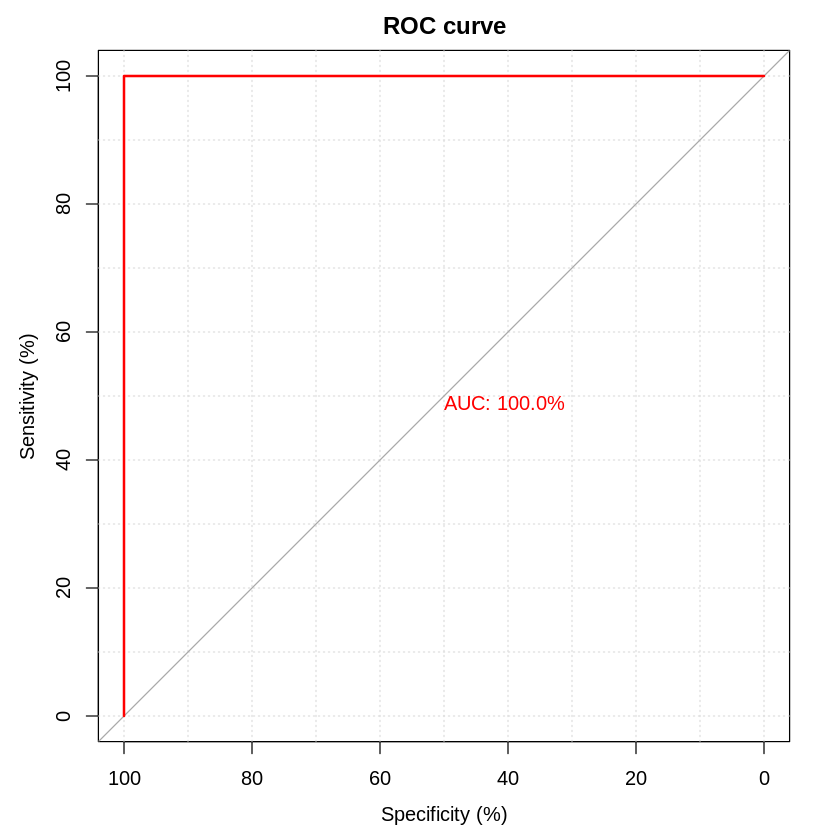

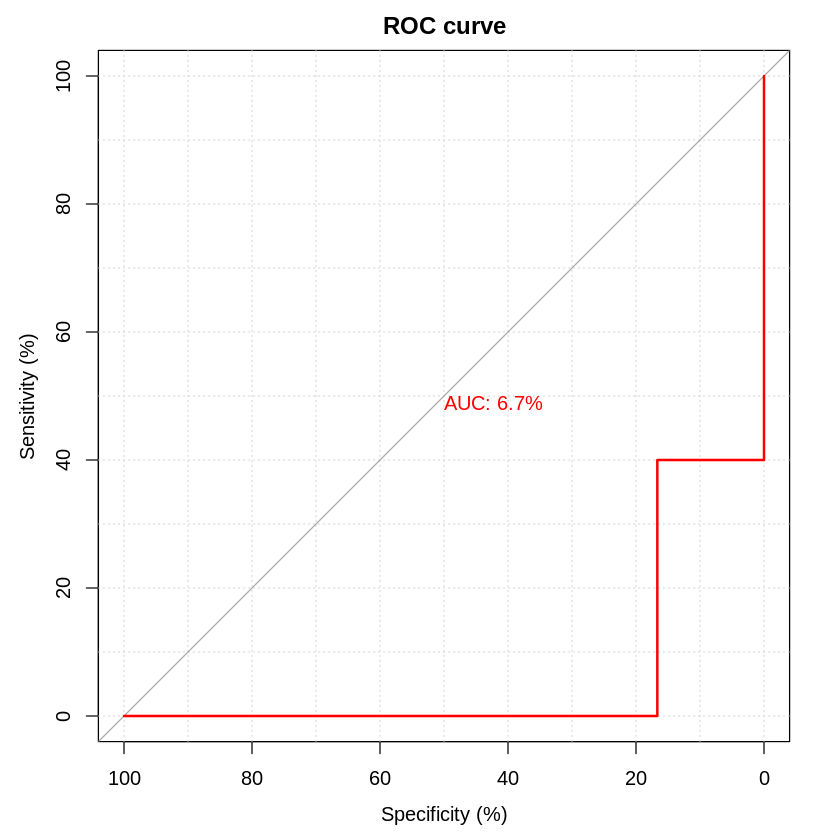


Call:
multiclass.roc.default(response = trainset$class, predictor = rforest$votes[,     1], percent = TRUE, direction = ">", grid = TRUE, print.auc = TRUE,     col = "red", plot = TRUE, main = "ROC curve")

Data: rforest$votes[, 1] with 4 levels of trainset$class: Basal, Claudin-low, Luminal, Normal-like.
Multi-class area under the curve: 65.71%



Call:
roc.default(response = response, predictor = predictor, levels = X,     percent = percent, direction = ..1, auc = FALSE, ci = FALSE,     plot = TRUE, grid = TRUE, print.auc = TRUE, col = "red",     main = "ROC curve")

Data: predictor in 14 controls (response Basal) > 6 cases (response Claudin-low).
Area under the curve not computed.

[1] 4

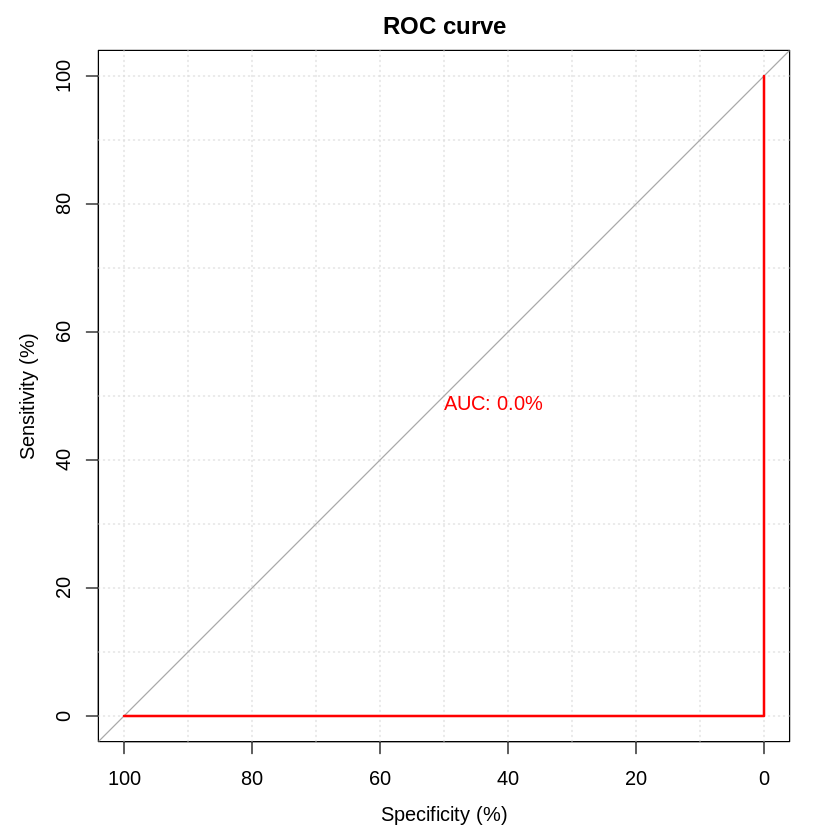

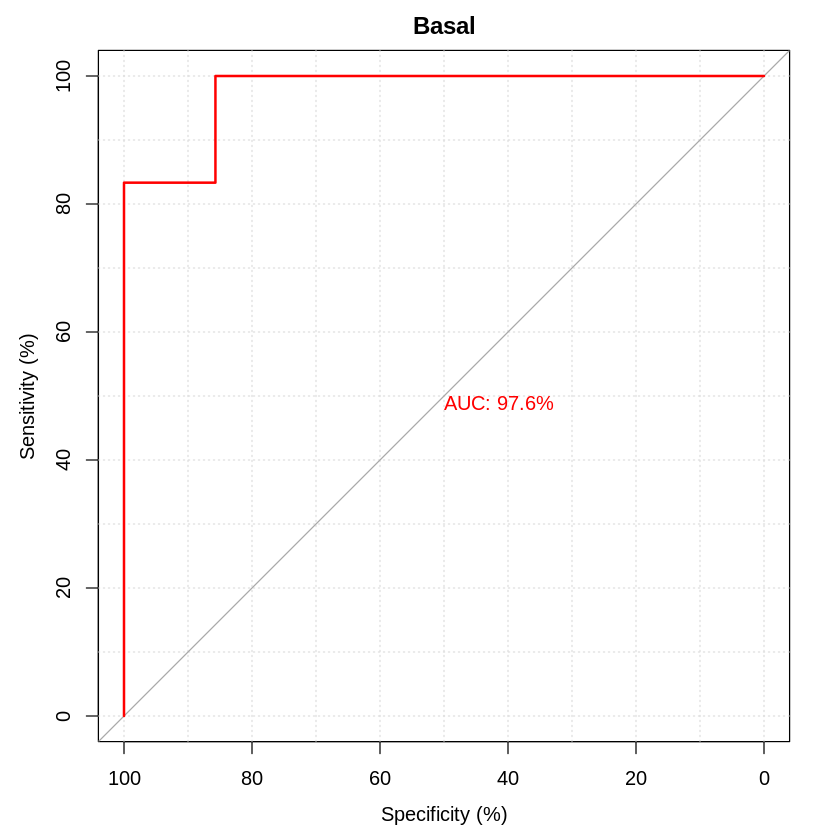

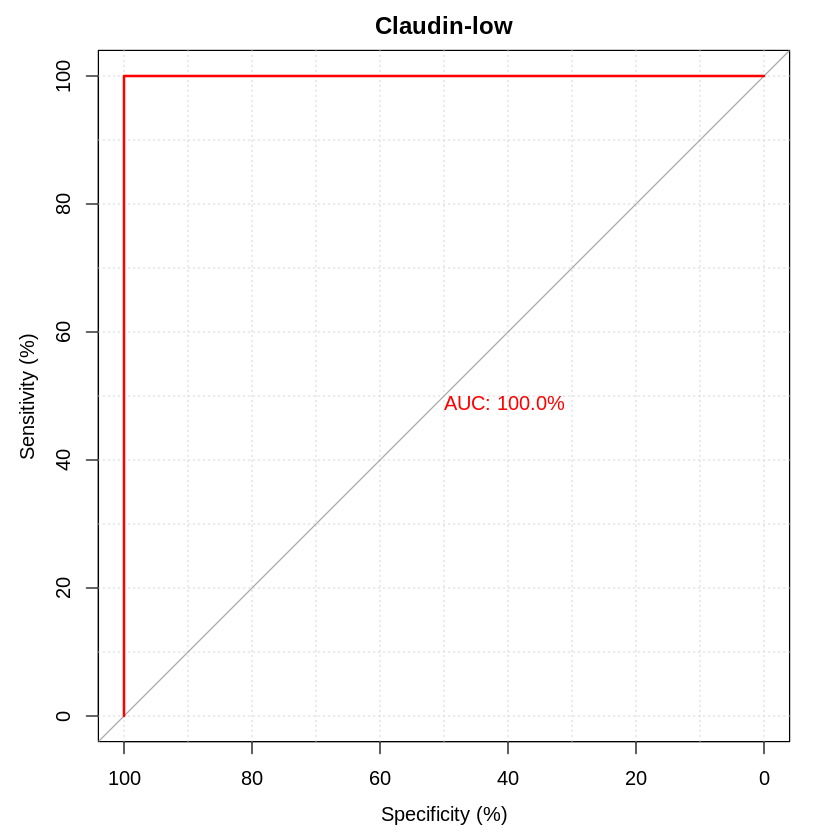

Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"colour" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"percent" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"colour" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"percent" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"colour" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"percent" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"colour" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"percent" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"colour" is not a graphical paramete

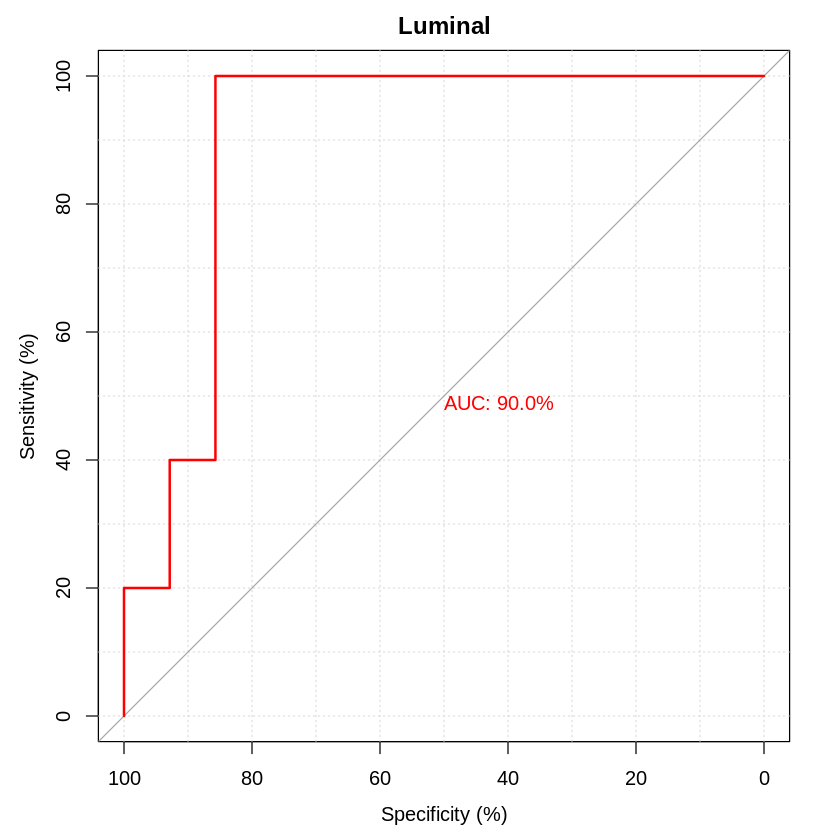

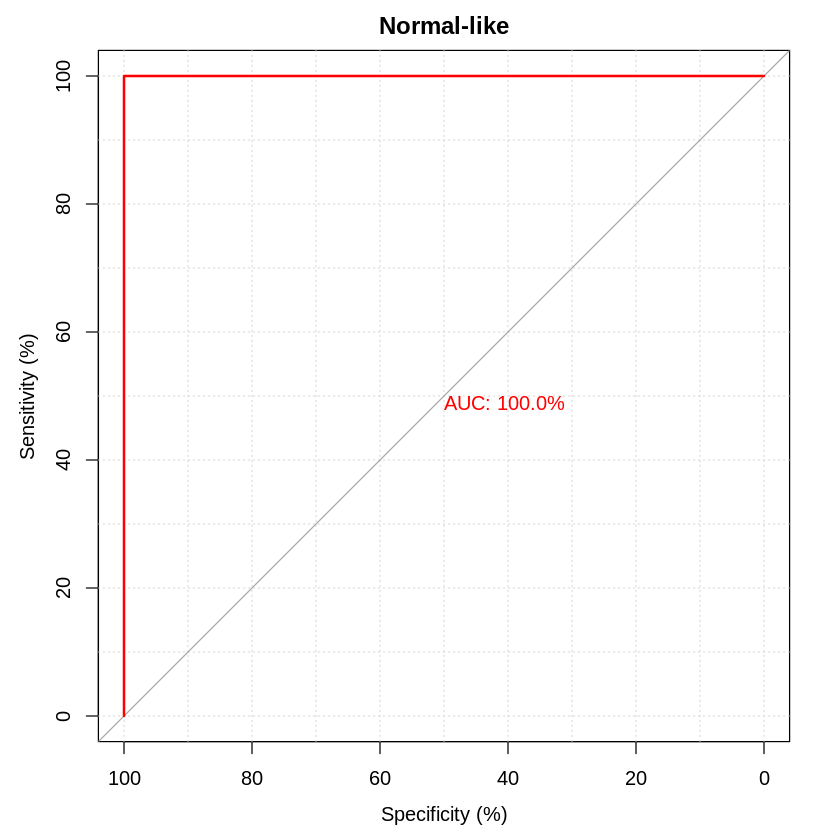

In [ ]:
roc1 <- multiclass.roc(trainset$class,rforest$votes[,1], percent=TRUE, grid=TRUE, print.auc=TRUE, col='red', direction='>', plot=TRUE, main="ROC curve")
print(roc1)

roc1$rocs[[1]]
length(roc1$levels)


#print ROC plots
for(i in c(1,2,3,4)){
  plot(roc1$rocs[[i]], colour = "green", main = roc1$levels[[i]], percent=TRUE, grid=TRUE, print.auc=TRUE, col='red')
}


This R code uses the multiclass.roc function from the "pROC" package to generate a multiclass ROC curve for the random forest classifier ("rforest"). It prints and plots the ROC curve, including the area under the curve (AUC) for each class. Additionally, it prints information about the ROC curve and plots individual ROC curves for each class.

## **8. Sort features based on MeanDecrease accuracy value.**

In [ ]:
# Sort features based on meanDecreaseAccuracy value
sorted_features <- as.data.frame(features[order(features[,"MeanDecreaseAccuracy"], decreasing = TRUE),])

This R code creates a new data frame named "sorted_features" by sorting the features based on the "MeanDecreaseAccuracy" values in descending order. The order function is used to arrange the rows of the "features" data frame based on the specified column. The resulting "sorted_features" data frame provides a ranked list of features based on their importance in improving accuracy in the random forest model.

## **9. Select top features with mean decrease accuracy score above 1.**5.
You can set this threshold yourself

In [ ]:
#select only top features (meanDecreaseaccuracy >1.5)
top_features <- sorted_features[sorted_features$MeanDecreaseAccuracy>1.5, ]


This R code creates a subset named "top_features" by selecting only those rows from the "sorted_features" data frame where the "MeanDecreaseAccuracy" value is greater than 1.5. This operation filters and retains only the features that have a substantial impact on improving accuracy in the random forest model.

## **10. Create dataframe of features only.**

In [ ]:
#create data frame for features only
top1 <- as.data.frame(row.names(top_features))

#add class column as well
top1<-rbind(c("class"), top1)

#add column names
colnames(top1) <- c("ID")


#Write into a file
write.table(top1,'top_features_list.txt', row.names=F,  sep='\t', quote=FALSE)


This R code creates a new data frame named "top1" containing the features from the "top_features" subset. It adds a "class" column and sets column names. Finally, it writes the resulting data frame into a text file named "top_features_list.txt" in tab-separated format, excluding row names. The file can be used to store and share information about the selected top features.

## **11. Prepare dataset (training/test) for selected only.**

In [ ]:
#Read full data
full_data <- read.table("https://code.omicslogic.com/assets/datasets/cell_lines/CellLines_52samples_ExprData_T1.txt", sep='\t', header=TRUE, stringsAsFactors=FALSE)

# Prepare data with only selected top features
selected_data <- as.data.frame(full_data[ full_data$id %in% c(top1$ID), ])

#Write selected data in a txt file
write.table(selected_data,'selected_data.txt', row.names=F,  sep='\t', quote=FALSE)

#Tranpose selected data
selected_data_t <- as.data.frame(t(selected_data))
colnames(selected_data_t)<-NULL

#Write transposed selected data in a txt file
write.table(selected_data_t,'selected_data_transposed.txt', row.names=T, col.names=F, sep='\t', quote=FALSE)


This R code reads the full dataset from a URL, selects only the rows corresponding to the top features identified earlier, and writes the resulting data frame into a text file named "selected_data.txt" in tab-separated format. Additionally, it transposes the selected data, and the transposed version is written into a text file named "selected_data_transposed.txt" in tab-separated format. These files can be useful for further analysis or downstream processing with the reduced set of top features.

## **12. Create PCA plot for selected features.**

[1]  52 105

,ENSG00000006071,ENSG00000011422,ENSG00000014216,ENSG00000019549,ENSG00000024422,ENSG00000026025,ENSG00000026508,ENSG00000039068,ENSG00000040275,ENSG00000058085,⋯,ENSG00000198740,ENSG00000203499,ENSG00000203875,ENSG00000206075,ENSG00000214530,ENSG00000227077,ENSG00000235123,ENSG00000237441,ENSG00000238206,ENSG00000250722
X184A1,1.01,4.50,8.35,6.01,6.99,3.42,9.12,5.98,4.61,7.71,⋯,2.13,2.59,8.44,7.20,6.63,7.58,0.00,3.63,0.55,0.00
X184B5,0.24,4.59,8.52,5.19,6.79,1.75,8.57,7.20,3.32,6.82,⋯,1.81,3.76,9.33,8.12,6.40,7.86,0.00,5.73,1.28,2.54
X21MT1,0.00,7.28,7.56,4.23,3.06,8.61,8.40,7.55,3.08,8.49,⋯,1.94,6.30,6.33,3.82,7.16,7.16,0.50,5.57,0.37,0.63
X21NT,0.10,6.50,7.69,4.15,5.03,7.93,8.30,7.46,3.50,8.11,⋯,2.21,5.73,6.99,4.17,6.52,7.34,0.08,6.07,0.90,3.31
X21PT,0.00,6.97,7.64,4.40,5.14,8.16,8.42,7.50,3.45,8.27,⋯,2.17,6.04,6.30,4.05,6.32,7.28,0.00,5.79,0.74,3.54
X600MPE,0.11,3.27,5.86,0.00,3.56,1.09,3.00,7.23,4.66,4.95,⋯,4.17,4.71,8.65,3.54,7.12,4.06,1.33,6.23,4.30,4.73


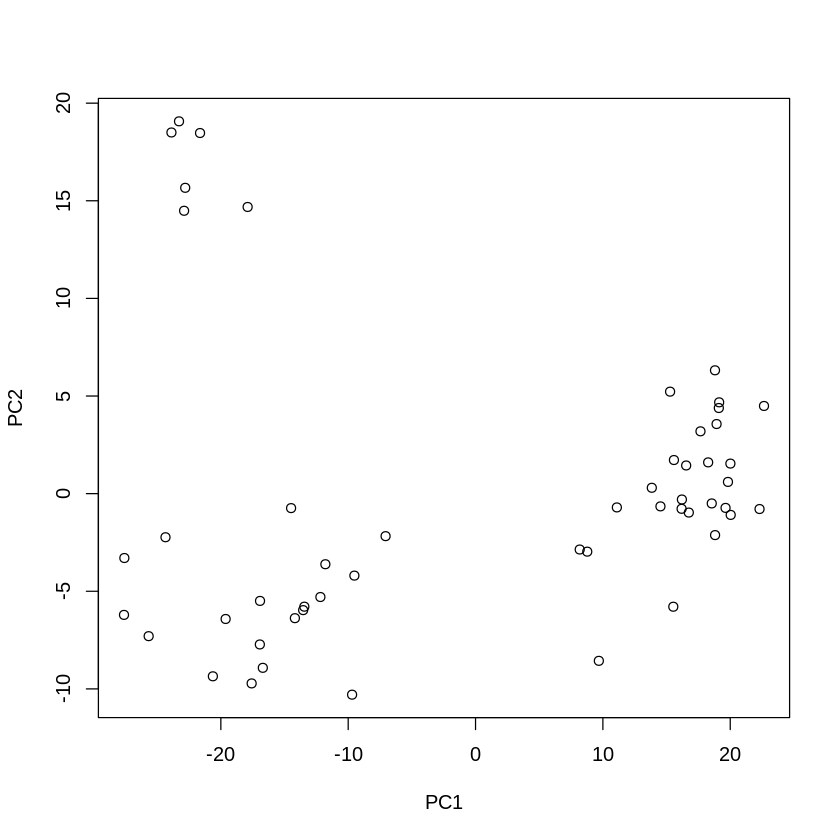

In [ ]:
pca_input <- read.table("selected_data_transposed.txt", sep="\t", header=TRUE,  row.names=1)
dim(pca_input)
#head(pca_input)

df <- as.matrix(pca_input[2:ncol(pca_input)])
head(df)

#create PCA object
pca_res <- prcomp(df)

#Draw simple PCA
plot(pca_res$x, pca_res$y)


This R code reads the transposed selected data from the "selected_data_transposed.txt" file into a data frame named "pca_input." It then extracts the numeric values from the data frame, creates a PCA (Principal Component Analysis) object using the prcomp function, and plots the resulting PCA using the plot function.

## **13. Create colored PCA plot based on class of samples.**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin




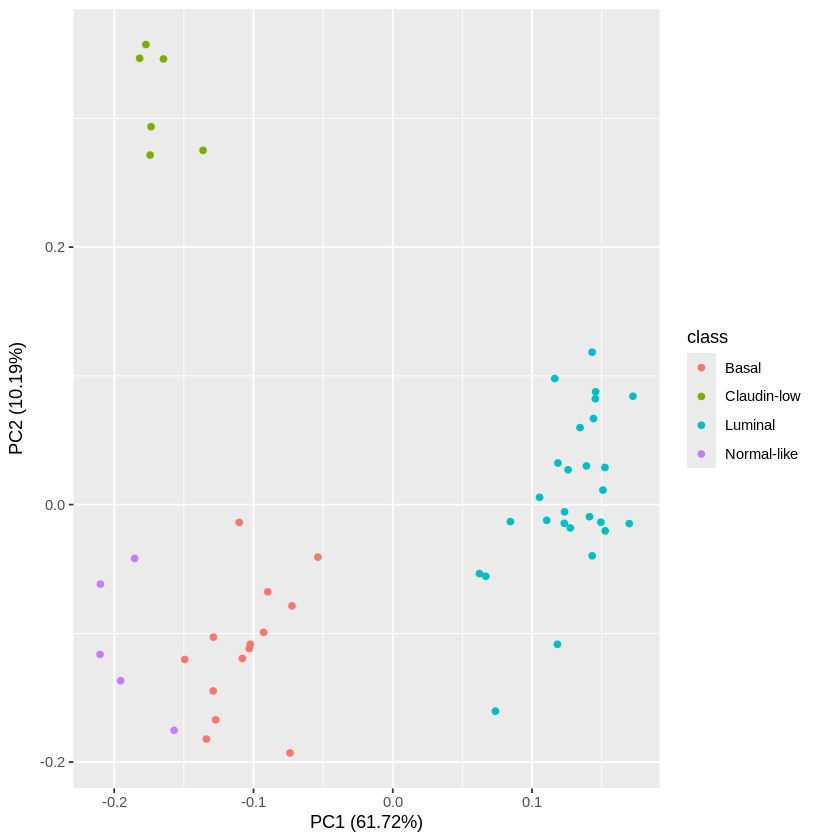

In [ ]:
#create PCA plot with ggfortify library
install.packages("ggfortify")
library(ggfortify)
#autoplot(pca_res)

#color PCA plot based on class of samples
autoplot(pca_res, data=pca_input, colour="class")


This R code installs the "ggfortify" package, loads it into the R session, and then uses the autoplot function to create a PCA plot. The plot is enhanced by coloring the points based on the class information provided in the "pca_input" data frame. This allows for a visual representation of the distribution of samples in the principal component space, with different colors representing different classes.